In [149]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'500',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0170adfb-d10d-4926-89b5-bdf27b28468a',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2024-07-16T15:18:43.331Z', 'error_code': 0, 'error_message': None, 'elapsed': 65, 'credit_count': 3, 'notice': None, 'total_count': 9995}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11603, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [151]:
type(data)

dict

In [153]:
import pandas as pd

pd.set_option('display.max_columns', None)


In [155]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2024-07-16T15:18:43.331Z,0,None,65,3,None,9995


In [159]:
df = pd.json_normalize(data['data'])

In [161]:
df['timestamp'] = pd.to_datetime('now')
df

/var/folders/8h/9gmsq3cs31x_3_h2tk391hk40000gp/T/ipykernel_15508/2164610331.py:1: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11603,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19726450.00000,19726450.00000,False,NaN,1,NaN,NaN,NaN,2024-07-16T15:17:00.000Z,64224.47570,41219492841.14495,36.30640,0.91173,1.81881,12.03271,-3.52531,-4.10713,5.29733,1266920908673.73145,53.77590,1348713989701.56006,NaN,2024-07-16T15:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-16 15:18:57.403337
1,1027,Ethereum,ETH,ethereum,9136,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120219581.13070,120219581.13070,True,NaN,2,NaN,NaN,NaN,2024-07-16T15:16:00.000Z,3434.73681,20259167076.32745,43.21880,0.86266,1.96501,12.52332,-4.11345,10.93992,16.25829,412922620895.38635,17.55500,412922620895.39001,NaN,2024-07-16T15:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-16 15:18:57.403337
2,825,Tether USDt,USDT,tether,91668,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112862180225.15715,117072162581.82065,True,NaN,3,NaN,NaN,NaN,2024-07-16T15:16:00.000Z,1.00037,75555504843.71846,42.50930,-0.00526,-0.01068,0.03655,0.09708,-0.00858,0.01737,112903627276.34360,4.80000,117115155689.92000,NaN,2024-07-16T15:16:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-16 15:18:57.403337
3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147582129.42332,147582129.42332,False,NaN,4,NaN,NaN,NaN,2024-07-16T15:16:00.000Z,572.73993,2064332266.84097,12.37790,0.62876,0.00317,11.22792,-5.91806,-1.56179,9.30851,84526178094.36130,3.58690,84526178094.36000,NaN,2024-07-16T15:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-16 15:18:57.403337
4,5426,Solana,SOL,solana,701,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,464182632.73208,580292445.49217,True,NaN,5,NaN,NaN,NaN,2024-07-16T15:16:00.000Z,157.36071,2878845096.91506,36.04330,0.91845,3.16440,12.58337,6.96423,-6.70955,21.38879,73044108877.42752,3.10240,91315231506.61000,NaN,2024-07-16T15:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-16 15:18:57.403337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,5268,Energy Web Token,EWT,energy-web-token,29,2020-03-28T00:00:00.000Z,"[energy, enterprise-solutions, identity, subst...",NaN,30062138.00000,69017450.00000,False,NaN,496,51746598.72685,104021165.47662,NaN,2024-07-16T15:16:00.000Z,2.01020,1293961.61620,-28.48010,0.33816,-3.94495,1.42385,-15.82577,-39.61885,-1.05769,60430998.52776,0.00260,138739081.68000,NaN,2024-07-16T15:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-16 15:18:57.403337
496,7959,Venus BUSD,vBUSD,venus-busd,5,2020-12-12T00:00:00.000Z,"[stablecoin, bnb-chain]",NaN,2694770470.00000,2694770470.00000,False,NaN,497,NaN,NaN,NaN,2024-07-16T15:16:00.000Z,0.02235,0.00000,0.00000,0.03993,0.05991,0.13990,0.33040,0.13990,0.01996,60234134.17489,0.00000,60234134.17000,NaN,2024-07-16T15:16:00.000Z,1839.00000,BNB Smart Chain (BEP20),BNB,bnb,0x95c78222B3D6e262426483D42CfA53685A67Ab9D,2024-07-16 15:18:57.403337
497,23757,ATOR Protocol,ATOR,airtor-protocol,41,2023-03-04T16:22:51.000Z,"[distributed-computing, paal-ecosystem, depin]",100000000.00000,57301509.17155,100000000.00000,False,NaN,498,42000000.00000,43810009.67708,NaN,2024-07-16T15:16:00.0

In [163]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    if not os.path.isfile(r'/Users/Prudhvi/Downloads/API files/API files.csv'):
        df.to_csv(r'/Users/Prudhvi/Downloads/API files/API files.csv', header='column_names')
    else:
        df.to_csv(r'/Users/Prudhvi/Downloads/API files/API files.csv', mode='a', header=False)
        


In [165]:
import os 
from time import time
from time import sleep

for i in range(100):
    api_runner()
    print('Transport completed')
    sleep(60)
exit()

/var/folders/8h/9gmsq3cs31x_3_h2tk391hk40000gp/T/ipykernel_15508/540550844.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


Transport completed


/var/folders/8h/9gmsq3cs31x_3_h2tk391hk40000gp/T/ipykernel_15508/540550844.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


Transport completed


/var/folders/8h/9gmsq3cs31x_3_h2tk391hk40000gp/T/ipykernel_15508/540550844.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


Transport completed


/var/folders/8h/9gmsq3cs31x_3_h2tk391hk40000gp/T/ipykernel_15508/540550844.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


Transport completed


/var/folders/8h/9gmsq3cs31x_3_h2tk391hk40000gp/T/ipykernel_15508/540550844.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


Transport completed


KeyboardInterrupt: 

In [167]:
df2 = pd.read_csv(r'/Users/Prudhvi/Downloads/API files/API files.csv')
df2

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11597,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19720109.00000,19720109.00000,False,NaN,1,NaN,NaN,NaN,2024-07-12T16:41:00.000Z,58171.64278,24828193333.13062,-11.89180,0.28801,0.96455,3.38221,-16.31899,-8.03570,-13.91794,1147151136334.83350,53.42830,1221604498384.43994,NaN,2024-07-12T16:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-12 16:42:52.705295
1,1,1027,Ethereum,ETH,ethereum,9130,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120211237.94806,120211237.94806,True,NaN,2,NaN,NaN,NaN,2024-07-12T16:40:00.000Z,3133.28595,12724564459.79010,-16.37760,0.30184,0.38487,5.32559,-13.22141,5.43490,-3.95582,376656182482.49329,17.53060,376656182482.48999,NaN,2024-07-12T16:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-12 16:42:52.705295
2,2,825,Tether USDt,USDT,tether,91491,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,112368902073.18105,116072162586.64011,True,NaN,3,NaN,NaN,NaN,2024-07-12T16:40:00.000Z,1.00045,46663886436.97083,-7.84810,0.01299,0.03382,0.03127,0.04589,0.06630,0.01709,112419894680.60075,5.23230,116124835720.49001,NaN,2024-07-12T16:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-12 16:42:52.705295
3,3,1839,BNB,BNB,bnb,2191,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147582386.97466,147582386.97466,False,NaN,4,NaN,NaN,NaN,2024-07-12T16:40:00.000Z,533.96248,1589050878.29593,-5.13750,0.70945,1.15121,7.66385,-15.14933,-10.53802,-9.11942,78803457823.20264,3.66770,78803457823.20000,NaN,2024-07-12T16:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-12 16:42:52.705295
4,4,5426,Solana,SOL,solana,700,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,463954522.79658,579988845.26305,True,NaN,5,NaN,NaN,NaN,2024-07-12T16:40:00.000Z,138.87685,2204204827.33423,11.73070,0.17428,0.30570,2.44930,-12.53598,-7.42006,-5.81452,64432540975.34390,2.99550,80547021747.73000,NaN,2024-07-12T16:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-12 16:42:52.705295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,10,1958,TRON,TRX,tron,999,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,87112132753.40521,87112268443.14485,True,NaN,11,71659659264.00000,9598109557.41473,NaN,2024-07-16T15:21:00.000Z,0.13394,451304974.16425,56.62220,0.11207,-2.99081,4.05486,15.99092,7.31794,21.91546,11667817047.06319,0.49530,11667835221.37000,NaN,2024-07-16T15:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-16 15:23:12.164355
146,11,5994,Shiba Inu,SHIB,shiba-inu,845,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,589270744013934.12500,589519212617999.75000,False,NaN,12,NaN,NaN,NaN,2024-07-16T15:20:00.000Z,0.00002,748347329.77843,160.07920,1.75701,6.97405,19.05426,-7.52133,-22.78977,-10.96984,11378434483.33935,0.48300,11383232250.34000,NaN,2024-07-16T15:20:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2024-07-16 15:23:12.164355
147,12,5805,Avalanche,AVAX,avalanche,751,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748719.00000,394511289.86556,443857659.86556,Fals

In [45]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11597,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.972011e+07,1.972011e+07,False,NaN,1,NaN,NaN,None,2024-07-12T16:46:00.000Z,58079.048328,2.486201e+10,-11.7954,0.191350,0.803846,3.020943,-16.487756,-7.938977,-13.866764,1.145325e+12,53.4037,1.219660e+12,None,2024-07-12T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-12 16:47:24.582345
1,1027,Ethereum,ETH,ethereum,9130,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202112e+08,1.202112e+08,True,NaN,2,NaN,NaN,None,2024-07-12T16:45:00.000Z,3132.528177,1.274180e+10,-16.2856,0.174194,0.284332,5.360560,-13.246493,5.601666,-3.802019,3.765651e+11,17.5384,3.765651e+11,None,2024-07-12T16:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-12 16:47:24.582345
2,825,Tether USDt,USDT,tether,91491,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.123689e+11,1.160722e+11,True,NaN,3,NaN,NaN,None,2024-07-12T16:45:00.000Z,1.000291,4.671820e+10,-7.8146,0.005855,0.014664,0.028661,0.033487,0.043234,0.008049,1.124016e+11,5.2351,1.161059e+11,None,2024-07-12T16:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-12 16:47:24.582345
3,1839,BNB,BNB,bnb,2191,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475824e+08,1.475824e+08,False,NaN,4,NaN,NaN,None,2024-07-12T16:45:00.000Z,533.635758,1.589240e+09,-5.1655,0.631928,1.114643,7.650160,-15.226672,-10.515607,-9.225512,7.875524e+10,3.6680,7.875524e+10,None,2024-07-12T16:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-12 16:47:24.582345
4,5426,Solana,SOL,solana,700,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.639545e+08,5.799888e+08,True,NaN,5,NaN,NaN,None,2024-07-12T16:45:00.000Z,138.608118,2.204244e+09,11.5548,-0.031625,0.134161,2.417944,-12.779385,-7.254554,-5.836435,6.430786e+10,2.9976,8.039116e+10,None,2024-07-12T16:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-12 16:47:24.582345
5,3408,USDC,USDC,usd-coin,20926,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.397935e+10,3.397935e+10,False,NaN,6,NaN,NaN,None,2024-07-12T16:45:00.000Z,1.000123,5.139588e+09,-14.6230,0.010217,0.019143,0.011088,0.019032,0.002667,0.009973,3.398353e+10,1.5845,3.398353e+10,None,2024-07-12T16:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-12 16:47:24.582345
6,52,XRP,XRP,xrp,1352,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.580534e+10,9.998745e+10,False,NaN,7,NaN,NaN,None,2024-07-12T16:46:00.000Z,0.463918,1.530295e+09,46.1335,0.537748,4.520034,8.766893,-6.251237,-8.907599,-13.352447,2.588910e+10,1.2058,4.639180e+10,None,2024-07-12T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-12 16:47:24.582345
7,11419,Toncoin,TON,toncoin,458,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.506841e+09,5.108889e+09,True,NaN,8,3.414167e+09,2.498302e+10,None,2024-07-12T16:45:00.000Z,7.317457,2.431214e+08,15.8616,0.371594,2.250552,0.828998,-1.216254,-0.270111,9.340905,1.834370e+10,0.8544,3.738408e+10,None,2024-07-12T16:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-12 16:47:24.582345
8,74,Dogecoin,DOGE,dogecoin,1021,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1

In [169]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [171]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11603,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19726450.00000,19726450.00000,False,NaN,1,NaN,NaN,None,2024-07-16T15:22:00.000Z,64431.24203,41324502200.53108,36.05030,1.10293,2.22979,12.58500,-3.27125,-3.97337,5.67433,1270999674277.31958,53.84790,1353056082560.40991,None,2024-07-16T15:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-16 15:23:12.164355
1,1027,Ethereum,ETH,ethereum,9136,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120219581.13070,120219581.13070,True,NaN,2,NaN,NaN,None,2024-07-16T15:21:00.000Z,3446.78416,20319478706.28434,43.03850,1.18695,2.30510,13.05881,-3.99553,11.35898,15.96409,414370948381.40240,17.59100,414370948381.40002,None,2024-07-16T15:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-16 15:23:12.164355
2,825,Tether USDt,USDT,tether,91668,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112862180225.15715,117072162581.82065,True,NaN,3,NaN,NaN,None,2024-07-16T15:20:00.000Z,1.00026,75693382580.60742,42.19500,-0.01046,-0.06127,0.01614,0.08735,-0.02101,0.00980,112891426218.02513,4.79250,117102499508.02000,None,2024-07-16T15:20:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-16 15:23:12.164355
3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147582129.42332,147582129.42332,False,NaN,4,NaN,NaN,None,2024-07-16T15:21:00.000Z,574.15618,2067577562.42445,12.41700,0.76166,0.17030,11.27595,-5.73057,-1.47344,9.14454,84735191150.44881,3.58540,84735191150.45000,None,2024-07-16T15:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-16 15:23:12.164355
4,5426,Solana,SOL,solana,701,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,464182632.73208,580292445.49217,True,NaN,5,NaN,NaN,None,2024-07-16T15:20:00.000Z,157.79691,2884122392.45464,35.97990,1.03512,3.25511,12.91364,7.22529,-6.55564,20.87780,73246583338.10878,3.10800,91568352566.41000,None,2024-07-16T15:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-16 15:23:12.164355
5,3408,USDC,USDC,usd-coin,21005,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33904736788.30644,33904736788.30644,False,NaN,6,NaN,NaN,None,2024-07-16T15:20:00.000Z,0.99985,7995877007.03757,34.95460,-0.01154,-0.05061,-0.01437,-0.01669,-0.01734,-0.00695,33899737103.32301,1.43910,33899737103.32000,None,2024-07-16T15:20:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-16 15:23:12.164355
6,52,XRP,XRP,xrp,1353,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55805339473.00000,99987452475.00000,False,NaN,7,NaN,NaN,None,2024-07-16T15:22:00.000Z,0.58387,2938165574.92891,82.34000,2.25414,10.51728,35.19952,18.99989,11.06455,20.81523,32582997404.60365,1.38320,58386881456.69000,None,2024-07-16T15:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-16 15:23:12.164355
7,11419,Toncoin,TON,toncoin,459,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2511557603.95700,5109063087.71348,True,NaN,8,3414166606.00000,25155111357.92690,None,2024-07-16T15:20:00.000Z,7.36786,294384766.12490,32.82360,0.67756,-0.68460,0.95385,-7.79739,10.77312,19.09454,18504812008.39981,0.78560,37642876208.87000,None,2024-07-16T15:

In [173]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,1.10293,2.22979,12.58500,-3.27125,-3.97337,5.67433
Ethereum,1.18695,2.30510,13.05881,-3.99553,11.35898,15.96409
Tether USDt,-0.01046,-0.06127,0.01614,0.08735,-0.02101,0.00980
BNB,0.76166,0.17030,11.27595,-5.73057,-1.47344,9.14454
Solana,1.03512,3.25511,12.91364,7.22529,-6.55564,20.87780
USDC,-0.01154,-0.05061,-0.01437,-0.01669,-0.01734,-0.00695
XRP,2.25414,10.51728,35.19952,18.99989,11.06455,20.81523
Toncoin,0.67756,-0.68460,0.95385,-7.79739,10.77312,19.09454
Dogecoin,1.35953,4.92634,15.85467,-9.15622,-19.44573,-15.98095


In [175]:
df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h      1.10293
           quote.USD.percent_change_24h     2.22979
           quote.USD.percent_change_7d     12.58500
           quote.USD.percent_change_30d    -3.27125
           quote.USD.percent_change_60d    -3.97337
                                             ...   
Chainlink  quote.USD.percent_change_24h     3.51920
           quote.USD.percent_change_7d     12.41895
           quote.USD.percent_change_30d    -4.26960
           quote.USD.percent_change_60d   -10.38038
           quote.USD.percent_change_90d     9.99960
Length: 90, dtype: float64

In [177]:
df4

name                                   
Bitcoin    quote.USD.percent_change_1h      1.10293
           quote.USD.percent_change_24h     2.22979
           quote.USD.percent_change_7d     12.58500
           quote.USD.percent_change_30d    -3.27125
           quote.USD.percent_change_60d    -3.97337
                                             ...   
Chainlink  quote.USD.percent_change_24h     3.51920
           quote.USD.percent_change_7d     12.41895
           quote.USD.percent_change_30d    -4.26960
           quote.USD.percent_change_60d   -10.38038
           quote.USD.percent_change_90d     9.99960
Length: 90, dtype: float64

In [179]:
type(df4)

pandas.core.series.Series

In [181]:
df5 = df4.to_frame(name='values')
df5

values
name                                            
Bitcoin   quote.USD.percent_change_1h    1.10293
          quote.USD.percent_change_24h   2.22979
          quote.USD.percent_change_7d   12.58500
          quote.USD.percent_change_30d  -3.27125
          quote.USD.percent_change_60d  -3.97337
...                                          ...
Chainlink quote.USD.percent_change_24h   3.51920
          quote.USD.percent_change_7d   12.41895
          quote.USD.percent_change_30d  -4.26960
          quote.USD.percent_change_60d -10.38038
          quote.USD.percent_change_90d   9.99960

[90 rows x 1 columns]

In [183]:
df5.count()

values    90
dtype: int64

In [185]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,1.10293
1,Bitcoin,quote.USD.percent_change_24h,2.22979
2,Bitcoin,quote.USD.percent_change_7d,12.58500
3,Bitcoin,quote.USD.percent_change_30d,-3.27125
4,Bitcoin,quote.USD.percent_change_60d,-3.97337
...,...,...,...
85,Chainlink,quote.USD.percent_change_24h,3.51920
86,Chainlink,quote.USD.percent_change_7d,12.41895
87,Chainlink,quote.USD.percent_change_30d,-4.26960
88,Chainlink,quote.USD.percent_change_60d,-10.38038


In [187]:
df7 = df6.rename(columns={'level_1':'Percent_Change'})
df7

,name,Percent_Change,values
0,Bitcoin,quote.USD.percent_change_1h,1.10293
1,Bitcoin,quote.USD.percent_change_24h,2.22979
2,Bitcoin,quote.USD.percent_change_7d,12.58500
3,Bitcoin,quote.USD.percent_change_30d,-3.27125
4,Bitcoin,quote.USD.percent_change_60d,-3.97337
...,...,...,...
85,Chainlink,quote.USD.percent_change_24h,3.51920
86,Chainlink,quote.USD.percent_change_7d,12.41895
87,Chainlink,quote.USD.percent_change_30d,-4.26960
88,Chainlink,quote.USD.percent_change_60d,-10.38038


In [189]:
df7['Percent_Change'] = df7['Percent_Change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,Percent_Change,values
0,Bitcoin,1h,1.10293
1,Bitcoin,24h,2.22979
2,Bitcoin,7d,12.58500
3,Bitcoin,30d,-3.27125
4,Bitcoin,60d,-3.97337
...,...,...,...
85,Chainlink,24h,3.51920
86,Chainlink,7d,12.41895
87,Chainlink,30d,-4.26960
88,Chainlink,60d,-10.38038


In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

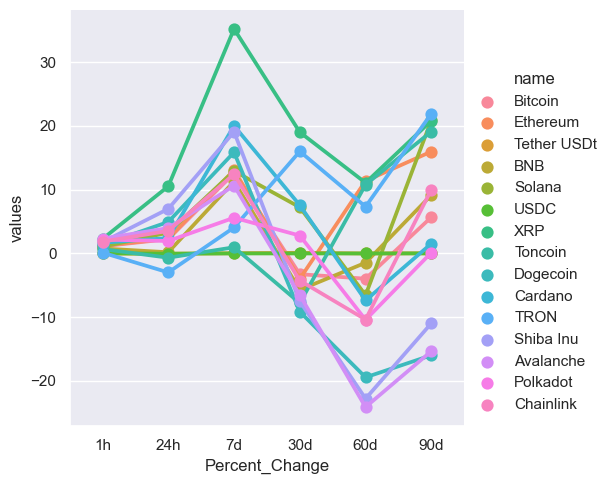

In [193]:
sns.catplot(x='Percent_Change' , y='values' , hue='name' , data=df7 , kind='point')

In [197]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,64431.24203,2024-07-16 15:23:12.164355


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

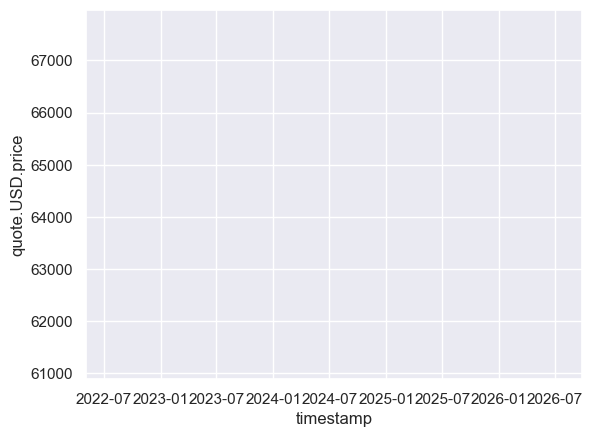

In [199]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)